I use 311 noisy comlain data to analysis.

3-1-1 is a special telephone number supported in many communities in Canada and the United States. The number provides access to non-emergency municipal services. The number format follows the N11 code for a group of short, special-purpose local numbers as designated in the North American Numbering Plan.
The number 3-1-1 is intended in part to divert routine inquiries and non-urgent community concerns from the 9-1-1 number which is reserved for emergency service. A promotional website for 3-1-1 in Akron described the distinction as follows: "Burning building? Call 9-1-1. Burning Question? Call 3-1-1."

In [146]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
import scipy as sp
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [147]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yy2908/PUIdata


In [148]:
noisy = pd.read_csv(os.getenv("PUIDATA") + '/noise_data.csv')

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [149]:
noisy.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [150]:
Complaint = noisy[noisy['Complaint Type'].str.contains('Residential')]
Complaint.shape

(1501851, 41)

In [151]:
Complaint.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [152]:
Complaint.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
6,33965605,07/29/2016 11:10:58 PM,07/30/2016 02:54:47 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11237.0,238 IRVING AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700378,-73.916788,"(40.700377999517066, -73.91678784842019)"


In [153]:
Complaint =Complaint.loc[(Complaint['Incident Zip']>=10000)&(Complaint['Incident Zip']<11500)]
Complaint.head()
#take only NYC zip codes

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
6,33965605,07/29/2016 11:10:58 PM,07/30/2016 02:54:47 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11237.0,238 IRVING AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700378,-73.916788,"(40.700377999517066, -73.91678784842019)"
10,33965655,07/29/2016 04:17:55 PM,07/29/2016 05:43:56 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11231.0,428 COLUMBIA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676570,-74.006789,"(40.6765695489937, -74.00678856329901)"
11,33965667,07/30/2016 01:38:11 AM,07/30/2016 03:22:21 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688400,-73.951174,"(40.68840033885293, -73.95117352620218)"
12,33965674,07/29/2016 04:06:13 PM,07/29/2016 05:45:00 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11231.0,82 DWIGHT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676141,-74.008908,"(40.67614121958238, -74.0089083548535)"
20,33965731,07/29/2016 02:58:01 PM,07/29/2016 04:21:39 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11208.0,100 ESSEX STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682077,-73.883287,"(40.68207695792136, -73.88328688467625)"


In [154]:
# set datetime
Complaint['Date'] = Complaint['Created Date'].str[:19]
Complaint['Date'] = pd.to_datetime(Complaint['Created Date'])
Complaint['Year'] = Complaint['Date'].dt.strftime('%Y')

In [155]:
Complaint.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Date,Year
6,33965605,07/29/2016 11:10:58 PM,07/30/2016 02:54:47 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11237.0,238 IRVING AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.700378,-73.916788,"(40.700377999517066, -73.91678784842019)",2016-07-29 23:10:58,2016
10,33965655,07/29/2016 04:17:55 PM,07/29/2016 05:43:56 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11231.0,428 COLUMBIA STREET,...,NaN,NaN,NaN,NaN,NaN,40.676570,-74.006789,"(40.6765695489937, -74.00678856329901)",2016-07-29 16:17:55,2016
11,33965667,07/30/2016 01:38:11 AM,07/30/2016 03:22:21 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.688400,-73.951174,"(40.68840033885293, -73.95117352620218)",2016-07-30 01:38:11,2016
12,33965674,07/29/2016 04:06:13 PM,07/29/2016 05:45:00 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11231.0,82 DWIGHT STREET,...,NaN,NaN,NaN,NaN,NaN,40.676141,-74.008908,"(40.67614121958238, -74.0089083548535)",2016-07-29 16:06:13,2016
20,33965731,07/29/2016 02:58:01 PM,07/29/2016 04:21:39 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11208.0,100 ESSEX STREET,...,NaN,NaN,NaN,NaN,NaN,40.682077,-73.883287,"(40.68207695792136, -73.88328688467625)",2016-07-29 14:58:01,2016


In [156]:
Complaint2016 = Complaint[Complaint['Year']=='2016']
Complaint2016 = Complaint2016.groupby(['Incident Zip']).size().reset_index()

In [157]:
Complaint2016.head()

,Incident Zip,0
0,10000.0,1
1,10001.0,949
2,10002.0,2381
3,10003.0,1450
4,10004.0,35


In [158]:
Complaint2017 = Complaint[Complaint['Year']=='2017']
Complaint2017 = Complaint2017.groupby(['Incident Zip']).size().reset_index()

In [159]:
Complaint2017.head()

,Incident Zip,0
0,10000.0,1
1,10001.0,802
2,10002.0,2791
3,10003.0,1331
4,10004.0,29


In [160]:
df = pd.merge(Complaint2016, Complaint2017, on='Incident Zip', how='inner') 
df.head()

,Incident Zip,0_x,0_y
0,10000.0,1,1
1,10001.0,949,802
2,10002.0,2381,2791
3,10003.0,1450,1331
4,10004.0,35,29


In [161]:
df.rename(columns={"Incident Zip":"Zipcode","0_x":"2016","0_y":"2017"}, inplace=True)
df.head()

,Zipcode,2016,2017
0,10000.0,1,1
1,10001.0,949,802
2,10002.0,2381,2791
3,10003.0,1450,1331
4,10004.0,35,29


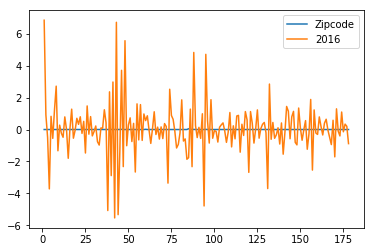

In [162]:
data = df[['Zipcode','2016']]
data2016 = np.log(data).diff().dropna()
data2016.plot()

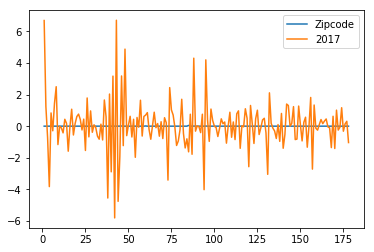

In [163]:
data = df[['Zipcode','2017']]
data2017 = np.log(data).diff().dropna()
data2017.plot()

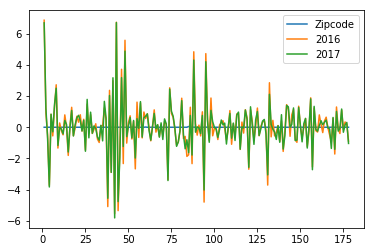

In [164]:
data = df[['Zipcode','2016','2017']]
data2017 = np.log(data).diff().dropna()
data2017.plot()

Figure1: The Residential nosiy complaint at most of areas increased in 2017 

Text(0.5,1,'Changes in log 2016 vs. log 2017')

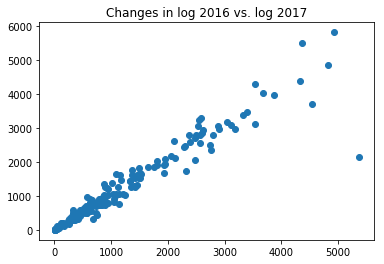

In [165]:
plt.scatter(df['2016'],df['2017'])
plt.title('Changes in log %s vs. log %s' %('2016','2017'))

Figure2: The relationship of Residential nosiy complaint between 2016 and 2017 is positive.

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c4bb088d0>,
      dtype=object)

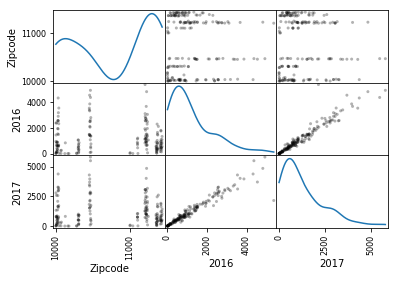

In [145]:
pd.scatter_matrix(df,diagonal='kde',color='k',alpha=0.3)

Figure3:Scatter Plot Matrix